### Introduction

Longstaff and Schwartz (2001) provide a numerically efficient method to solve this problem by what they call Least-Squares Monte Carlo (LSM). Their approach involves simulating paths, approximating continuation values for American options in backwards steps by an ordinary least-squares regression and applying the rule for early exercise. The value of the option is the average of the discounted payoffs for each path.

The LSM leads to a lower bound for the option’s value since the exercise decision is in any case sub-optimal.

Haugh and Kogan (2004), among others, propose a dual formulation of the valuation problem for an American option which finally leads to a MCS estimator that represents an upper bound to the option’s value. In some situations, it is very helpful to have an upper bound in addition to a lower bound since the LSM does not allow to assess “how much too low the value estimate is.”

### Continuous formulation
The valuation of contingent claims with American exercise is more involved. In its primal form, this problem can be formulated as an optimal stopping problem

$$V_0 = sup_{\tau\in[0,T]}\mathbb{E}_0[B_0(\tau)h_{\tau}(S_{\tau})]$$

$\tau$ is an $\mathcal{F}$ adapted stopping time, $T$ the date of maturity, $B_0(\tau)$ the discount factor appropriate for stopping time $\tau$, $h_{\tau}$ a non-negative, $\mathcal{F}_t$-measurable payoff function and $S_{\tau}$ is the underlying process stopped at $t = \tau$. The expectation is again taken under the risk-neutral measure Q. 

To value American options by MCS, the optimal stopping problem also has to be discretized:

### Discrete formulation

$$V_0 = \sup_{0,\Delta t, \dots, T}\mathbb{E}_0[B_0(\tau)h_{\tau}(S_{\tau})]$$

The continuation value $C_t$ at date t of the option, i.e. the value of not exercising the option at this date, is given under risk-neutrality as

$$C_t(s)=\mathbb{E}_t[e^{-r\Delta t}V_{t+\Delta t}(S_{t+\Delta t})|S_t=s]$$

using the Markov property of $S_t$. The value of the option at date $t$ is then

$$V_t(s)=\max[h_t(s), C_t(s)]$$

i.e. the maximum of the payoff $h_t(s)$ of immediate exercise and the expected payoff $C_t(s)$ of not exercising.


The decision to exercise an American option or not is dependent on the continuation value. Consider a simulation with M + 1 points in time and I paths. Given a simulated underlying price $S_{t,i}$, $t \in\{0,\dots, T\}$, $i \in \{1,\dots, I\}$, what is the continuation value $C_{t,i}( S_{t,i}$), i.e. the expected payoff of not exercising the option? Of course, by simulation you know the simulated continuation value $Y_{t,i} ≡ e^{-r\Delta t}V_{t+\Delta t, i}$. 

However, using these quantities directly would translate into perfect foresight— something not seen in financial markets and therefore not acceptable for a valuation algorithm. In other words, using these quantities would lead to a better-than-optimal exercise policy and therewith to a consistently high biased estimator. On the other hand, estimating the continuation value through a nested MCS, for example, would lead to generally unacceptable computational times.

The major insight of Longstaff-Schwartz is to estimate the continuation values $C_{t,i}$ by ordinary least-squares regression— hence the name Least-Squares Monte Carlo for their algorithm. They propose to regress the I continuation values $Y_{t,i}$ against the I simulated underlying prices $S_{t,i}$. Given D basis functions $\{B_d(x)\}$ with for the regression, the continuation value $C_{t,i} is according to their approach approximated by

$$\hat{C}_{t,i}=\sum_{d=1}^D \alpha^*_{d,t}\cdot B_d(S_{t,i})$$.


The optimal regression parameters $\alpha^*_{d,t}$ are the result of the minimization

$$\min_{\alpha_{1,t},\dots,\alpha_{D,t}}\frac{1}{I}\sum_{i=1}^I\left(C_{t,i}-\sum_{d=1}^D \alpha_{d,t}\cdot B_d(S_{t,i})\right)^2$$

In some circumstances, the quality of the regression can be improved upon when restricting the paths involved in the regression to those where the option is in-the-money. 

### Simple Numerical Example

Let's review a numerical  example  for  pricing  American  puts. 
Suppose $S_0=1, K = 1.1, T = 3yrs, r= 0.06, q=0$, and $\Delta t = 1yr$.

The simulated 8 stock prices are listed in the following table:

<img src="table1.png">

Step 1:  Determine the payoff for each path at maturity $(t = 3)$

<img src="table2.png">

Step 2:  For $t = 2$, the holding values are calculated as the present values of the option
values at the next time point, i.e., at $t = 3$.  The holding and exercise values for all paths
at $t = 2$ are listed as follows.

<img src="table3.png">

For in-the-money paths at $t=2$, i.e., paths 1, 3, 4, 6, and 7, decide whether or not it is
optimal to early exercise for these paths.  The main idea to achieve this goal is to employ
a regression equation, e.g.,

$$HV=a + bS + cS^2 + \nu$$

where S is the stock price at $t=2$ for paths $1, 3, 4, 6$ and $7$, and $\nu\sim N(0,\eta^2)$
is the white noise, to estimate the
expected holding value $\mathbb{E}[HV]=a+bS+cS^2$.

<img src="table4.png">

For paths $4, 6$ and $7$, since $EV > \mathbb{E}[HV]$, the option values for these paths at
$t = 2$ are the corresponding exercise values.  In addition, set the option value for these paths
at the subsequent time point, i.e., $t=3$ at the current step, to be zero.  For other paths,
the option values are the holding values, HV. 

Step 3:  For $t=1$, the holding values are calculated as the present value of the option
values at the subsequent time point, i.e., at $t=2$.  The holding and exercise values for all
paths at $t = 1$ are listed in the following table.

<img src="table5.png">

For in-the-money paths at $t = 1$,  i.e. paths $1,  4,  6,  7$  and $8$,  perform the regression
analysis to estimate the expected holding value, $\mathbb{E}[HV]$.

<img src="table6.png">

Step 3:  For $t = 1$, the holding values are calculated as the present value of the option
values at the sebsequent time point, i.e., at $t= 2$.  The holding and exercise values for all
paths at $t= 1$ are listed in the following table.

<img src="table7.png">

Step 4:  The American put option value at $t= 0$:
$$\frac{1}{8}(0 + 0 + 0.06208e^{-0.06} 
+ 0.17e^{-0.06} +0 + 0.34e^{-0.06} + 0.18e^{-0.06} + 0.22e^{-0.06}) = 0.1144>1.1-1.0$$
(The early exercise value today is 0.1, which is smaller than the option value today, $0
.1144$, so it is not optimal to early exercise today).

### Implementing the LSM Algorithm

<img src="table8.png">

In [2]:
#
# Valuation of American Options
# with Least-Squares Monte Carlo
#
import math
import numpy as np
np.random.seed(150000)

# Model Parameters
S0 = 52.  # initial stock level
K = 40.  # strike price
T = 1.0  # time-to-maturity
r = 0.06  # short rate
sigma = 0.2  # volatility

# Order of polynomial for LS regression
m = 3

# Simulation Parameters
I = 10
M = 1
dt = T / M
df = math.exp(-r * dt)
S = np.zeros((M+1, I))
# Stock Price Paths

S[0] = S0
for i in range(0,I):
    for j in range(1,M+1):
        S[j,i]=S[j-1,i]*(1.0+r*dt)
#S[1:(M+1),:] = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * np.random.standard_normal((M, I)), axis=0))


# Inner Values
h = np.maximum(S - K, 0)

# Present Value Vector (Initialization)
V = h[-1]

# American Option Valuation by Backwards Induction
for t in xrange(M - 1, 0, -1):
    rg = np.polyfit(S[t], V * df, m)
    C = np.polyval(rg, S[t])  # continuation values
    V = np.where(h[t] > C, h[t], V * df)# exercise decision
    
V0 = df * np.sum(V) / I  # LSM estimator

print "American call option value %5.3f" % V0

American call option value 14.239


### Solving the General Least Squared Fitting Problem

We just used numpy.polyfit for fitting a set of functions to (given)
data. However it would be useful to understand this function in more detail so that we can build our own fitting techniques for more generalized functions than just polynomials.

As a starting point, we describe the procedure for fitting an
m^{th} degree polynomial - it is straightforward to extend the idea to a
general class of polynomial.
When using an m^{th} degree polynomial

$$y=a_0 + a_1x +a_2x^2+ \cdots a_{m}x^m$$

to approximate the given set of data,
$$(x_1,y_1),(x_2,y_2),\dots,(x_m,y_m)$$

The best fitted curve $f(x)$
has the least square error, i.e.,
$$\pi=min\left(\sum_{i=1}^n(y_i - f(x_i))^2\right)$$


Note that $a_0, a_1, \dots, a_m$ are unknown coefficients
while all $x_i$ and $y_i$ are given. To obtain the least square
error, the first derivatives of $\pi$ must be zero w.r.t. to the unknown coefficients so that

$$\frac{\partial \pi}{\partial a_j}= - 2\sum_{i=1}^nx^j[y_i-(a_0 + a_1x_1 + \dots a_mx^m)]$$

thus giving a set of $m+1$ simultaneous equations which can be expressed in canonical form as the following linear system

$$ Ax=b$$
where:
$$ A= \left[ {\begin{array}{cccc} 
n & \sum_{i=1}^nx_i & \dots & \sum_{i=1}^nx_i^m \\ 
\sum_{i=1}^nx_i & \sum_{i=1}^nx_i^2 & \dots & \sum_{i=1}^nx_i^{m+1}\\ 
\dots & \dots & \dots & \dots\\
\sum_{i=1}^nx_i^m & \sum_{i=1}^nx_i^{m+1} & \dots & \sum_{i=1}^nx_i^{2m}\\ 
\end{array} } \right] $$
and
$$ x= \left[ {\begin{array}{c} 
a_0\\
a_1\\
\dots\\
a_m\\
\end{array} } \right] $$
and
$$ b= \left[ {\begin{array}{c} 
\sum_{i=1}^ny_i\\
\sum_{i=1}^nx_i y_i\\
\dots\\
\sum_{i=1}^nx_i^my_i\\
\end{array} } \right] $$

The general form of this kind of regression model is

$$\hat{C}(s)=\sum_{d=1}^D\alpha^*_d \cdot B_d(s)$$
where $B_1(s), \dots , B_D(s)$ are arbitrary fixed functions of s, referred to as basis functions.


One of the requirements for the regression analysis is that the explanatory variables should
be independent. For this reason, this choice of polynomial basis functions is error prone.  Orthogonal basis functions are typically used such as weighted Laguerre basis functions. Other choices are Hermite, 
Legendre, Chebyshev, Gegenbauer, and Jacobi polynomials. Laguerre basis functions take the form:

$$B_j(s) = e^{-s/2}\frac{e^s}{j!}\frac{d^j}{ds^j}(s^je^{-s})$$




In [3]:
#
# Valuation of American Options
# with Least-Squares Monte Carlo
#
import math
import numpy as np
from numpy.polynomial import laguerre


# Model Parameters
S0 = 52.  # initial stock level
K = 40.  # strike price
T = 1.0  # time-to-maturity
r = 0.06  # short rate
sigma = 0.2  # volatility

#calculate BS put price here (when r=0)
#V_exact
error = []
#for m in range(1,10):
# Order of polynomial for LS regression
np.random.seed(1)

# Simulation Parameters
I = 10
M = 2
dt = T / M
df = math.exp(-r * dt)
m = 2
# Stock Price Paths
S = np.zeros((M+1, I))
S[0] = S0
rng = [-1,1,0.5,-0.5,0.2,-0.2,0.4,-0.4,0.3,-0.3]
for i in range(0,I):
    for j in range(1,M+1):
        S[j,i]=S[j-1,i]*(1.0+r*dt+sigma*math.sqrt(dt)*rng[i]); # + sigma*math.sqrt(dt)*np.random.randn(1))
       
 
#S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
#    + sigma * math.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis=0))
h = np.maximum(S-K, 0)
 
# Inner Values


# Present Value Vector (Initialization)
V = h[-1]

#V[range(0,I,3)]=0  

# American Option Valuation by Backwards Induction
for t in xrange(M-1, 0, -1):
    
    rg= laguerre.lagfit(S[t], V * df, m)
    C = laguerre.lagval(S[t], rg)# continuation values
    V = np.where(h[t] > C, h[t], V * df)
      # exercise decision
V0 = df * np.sum(V) / I  # LSM estimator

print "American call option value %5.3f" % V0
#error.append(math.abs(V0-V_exact))

American call option value 15.583


In [126]:
# fit GP regression

import os
os.environ['TF_C_API_GRAPH_CONSTRUCTION']='0'
import tensorflow as tf
import edward as ed
import matplotlib.pyplot as plt
import numpy as np
from edward.models import Normal
from edward.util import rbf
plt.style.use('ggplot')
%matplotlib inline

In [207]:
n_train = 100
n_test = 5
d = 10
x_train = np.zeros(n_train * d, dtype = 'float32').reshape(n_train, d)
x_test = np.zeros(n_test * d, dtype = 'float32').reshape(n_test, d)
y_train = np.zeros(n_train)
y_test = np.zeros(n_test)

In [208]:
def setup(n, d, x, y):
    for i in range(n):
        temp = np.random.normal(50, 10, d)
        x[i] = temp
        h = np.maximum(S-K, 0)
        V = h[-1]
        for t in xrange(M, 1, -1):
            rg= laguerre.lagfit(temp, V * df, m)
            C = laguerre.lagval(temp, rg)   # continuation values
            V = np.where(h[t] > C, h[t], V * df)   # exercise decision
    
        y[i] = df * np.sum(V) / I  # LSM estimator

In [209]:
setup(n_train, d, x_train, y_train)
setup(n_test, d, x_test, y_test)

In [210]:
sess = ed.get_session()
Kernel = rbf(x_train).eval()
K_noise = Kernel + np.eye(n_train) * 0.01  # without noise, the cov band converge to 0 at the training points 
k_s = rbf(x_test, x_train).eval()                   
L = np.linalg.cholesky(K_noise)
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))
predict_mean = np.dot(k_s, alpha)

# cov
v = np.linalg.solve(L, k_s.T)
var = rbf(x_test).eval() - np.dot(v.T, v)

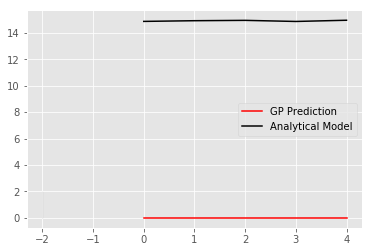

In [211]:
up = predict_mean - 2 * (np.sqrt(np.diag(var)))   # 95% confident interval 
down = predict_mean + 2 * (np.sqrt(np.diag(var)))

plt.figure(facecolor='white', edgecolor='black')
plt.plot(predict_mean, color = 'red', label = 'GP Prediction')
plt.plot(y_test, color = 'black', label = 'Analytical Model')
#plt.scatter(train_x, train_y, s = 150, color = 'black', marker = "+")
plt.fill_between(up, down, color = 'grey', alpha=0.2)
plt.grid(True)
#plt.xlim(90, 110)
#plt.xlabel('S')
#plt.ylabel('vegas')
plt.legend(loc = 'best', prop={'size':10})

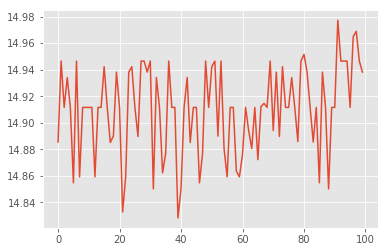

In [216]:
plt.plot(y_train)

In [9]:
n = 1
d = 10

X = tf.placeholder(tf.float32, [n, d])
w = Normal(loc=tf.zeros(d), scale=tf.ones(d))
b = Normal(loc=tf.zeros(1), scale=tf.ones(1))
y = Normal(loc=ed.dot(X, w) + b, scale=tf.ones(n))

In [10]:
qw = Normal(loc=tf.get_variable("qw/loc", [d]),
            scale=tf.nn.softplus(tf.get_variable("qw/scale", [d])))
qb = Normal(loc=tf.get_variable("qb/loc", [1]),
            scale=tf.nn.softplus(tf.get_variable("qb/scale", [1])))

In [11]:
# Iference
inference = ed.KLqp({w : qw, b: qb}, data={X: x_train, y: y_train})
inference.run(n_samples=5, n_iter=3000)

3000/3000 [100%] ██████████████████████████████ Elapsed: 7s | Loss: 49.918


In [12]:
#criticism
y_post = Normal(loc=ed.dot(X, qw) + qb, scale=tf.ones(n))

print("Mean squared error on test data:")
print(ed.evaluate('mean_squared_error', data={X: x_test, y_post: y_test}))

print("Mean absolute error on test data:")
print(ed.evaluate('mean_absolute_error', data={X: x_test, y_post: y_test}))

Mean squared error on test data:
3.39146
Mean absolute error on test data:
2.34082


In [13]:
def visualise(x_data, y_data, w, b, n_samples=10):
  w_samples = w.sample(n_samples)[:, 4].eval() # change 0 to other number to check the learning result of other dimentions.
  b_samples = b.sample(n_samples).eval()
  #plt.scatter(x_data, y_data)
  inputs = np.linspace(-10,10, num=400)
  for ns in range(n_samples):
    output = inputs * w_samples[ns] + b_samples[ns]
    plt.plot(inputs, output)

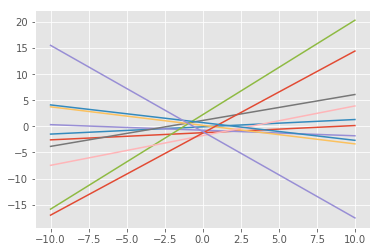

In [14]:
visualise(x_train, y_train, w, b)

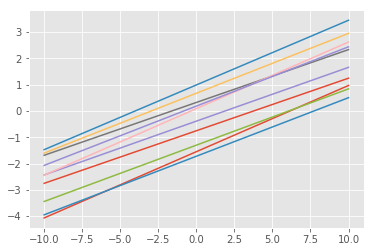

In [15]:
visualise(x_train, y_train, qw, qb)

given one dataset combination, the fitting result looks good, small errors and improved linear relationship for all dimentions of variable.

(array([   2.,    0.,    0.,    2.,    5.,    7.,   18.,   34.,   65.,
          87.,  139.,  168.,  218.,  252.,  277.,  315.,  313.,  280.,
         243.,  189.,  151.,   90.,   70.,   35.,   20.,    9.,    8.,
           1.,    1.,    1.]),
 array([ 18.45380211,  18.71331342,  18.97282473,  19.23233604,
         19.49184736,  19.75135867,  20.01086998,  20.27038129,
         20.5298926 ,  20.78940392,  21.04891523,  21.30842654,
         21.56793785,  21.82744916,  22.08696047,  22.34647179,
         22.6059831 ,  22.86549441,  23.12500572,  23.38451703,
         23.64402835,  23.90353966,  24.16305097,  24.42256228,
         24.68207359,  24.9415849 ,  25.20109622,  25.46060753,
         25.72011884,  25.97963015,  26.23914146]),
 <a list of 30 Patch objects>)

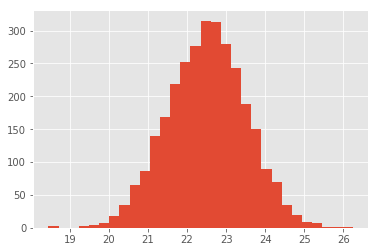

In [31]:
#feed = np.arange(100)
pp = y_post.sample(3000).eval(feed_dict = {X:x_test})
plt.hist(pp, bins=30)

(array([  19.,   83.,  326.,  615.,  810.,  638.,  347.,  128.,   28.,    6.]),
 array([  8.82039738,   9.48948994,  10.1585825 ,  10.82767506,
         11.49676762,  12.16586018,  12.83495274,  13.5040453 ,
         14.17313786,  14.84223042,  15.51132298]),
 <a list of 10 Patch objects>)

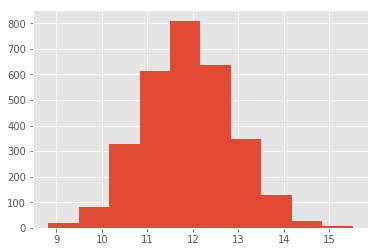

In [69]:
def sample_model(model_template, n_samples):
    model = model_template.copy(sample_shape=n_samples)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        samples = sess.run(model)
    return model, samples

#edward model: univariate Normal
mean = tf.Variable(3.0)
std = tf.Variable(1.0)
N = 1000

model_template = Normal(loc=mean, scale=std)

x, samples = sample_model(model_template, N)
fit = ed.MAP({}, data={x: samples})
fit.run()
sess = ed.get_session()
sess.run(std)

1000/1000 [100%] ██████████████████████████████ Elapsed: 2s | Loss: 1417.515


0.99857783